In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("sex_height_weight.csv")
df.head()

,Sex,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.isna().sum()

Sex       0
Height    0
Weight    0
dtype: int64

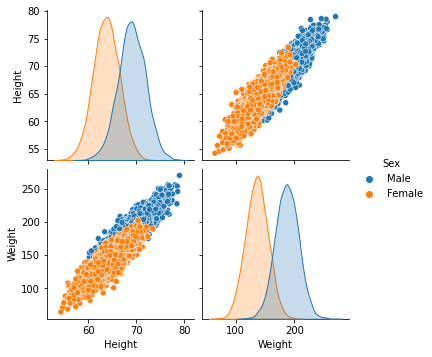

In [6]:
sns.pairplot(df, hue="Sex")

<AxesSubplot:xlabel='Sex', ylabel='Height'>

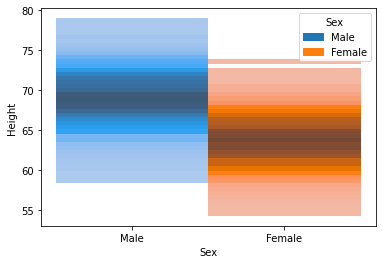

In [14]:
sns.histplot(df, x="Sex", y="Height", hue="Sex")

<AxesSubplot:xlabel='Sex', ylabel='Height'>

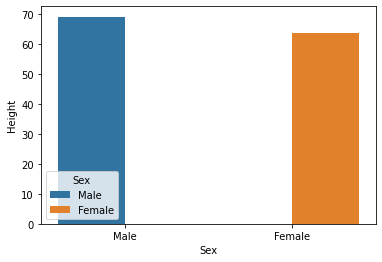

In [16]:
sns.barplot(x=df["Sex"], y=df["Height"], hue=df["Sex"])

In [18]:
df.shape

(10000, 3)

In [23]:
X = df.drop("Sex", axis =1).values
Y= df["Sex"].values

In [24]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
Y = label.fit_transform(Y)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [44]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [42]:
grid = {
    "n_estimators" : [100, 200, 300, 500],
    "criterion" : ['gini', "entropy"],
    "max_depth" : [None, 60, 50],
    "max_features" : ["auto", "sqrt", "log2"],
    "class_weight" : ["balanced", "balanced_subsample"]
}

In [43]:
from sklearn.model_selection import GridSearchCV

grid_rfc = GridSearchCV(rfc, grid, n_jobs=-1, cv= 10, scoring = "neg_mean_squared_error", verbose=2)
grid_rfc.fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 60, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [45]:
grid_rfc.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'log2',
 'n_estimators': 500}

In [46]:
y_preds = grid_rfc.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc = accuracy_score(y_test, y_preds)
pre = precision_score(y_test, y_preds)
rec = recall_score(y_test, y_preds)

print(f"Accuracy {acc*100:.2f}%")
print(f"Precision {pre*100:.2f}%")
print(f"Recall {rec*100:.2f}%")

Accuracy 90.23%
Precision 91.00%
Recall 89.36%


c:\users\shiva\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


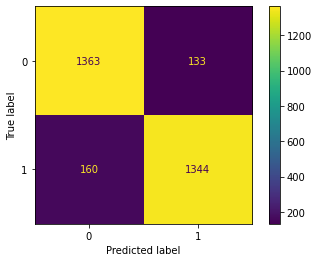

In [48]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(grid_rfc, X_test, y_test)

c:\users\shiva\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


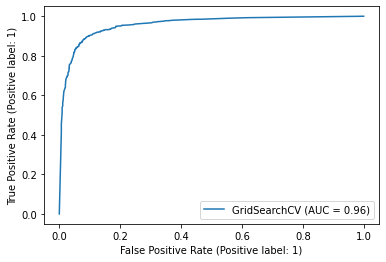

In [66]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(grid_rfc, X_test, y_test)

In [73]:
from sklearn.metrics import precision_recall_curve

precision_recall_curve(y_test, y_preds)

(array([0.50133333, 0.90995261, 1.        ]),
 array([1.        , 0.89361702, 0.        ]),
 array([0, 1]))

In [85]:
def auc_roc_curve(y_test):

    from sklearn.metrics import roc_auc_score, roc_curve
    from matplotlib import pyplot

    ns_probs = [0 for _ in range(len(y_test))]
    ns_auc = roc_auc_score(y_test, ns_probs)
    
    lr_auc = roc_auc_score(y_test, y_preds)
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, y_preds)
    
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='AUC')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='ROC')
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.legend()
    pyplot.show()

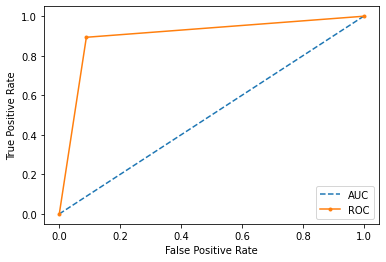

In [86]:
auc_roc_curve(y_test)